# EECS764P Coursework 2
- Name: Bheki Maenetja
- Student ID: 230382466

## Imports

In [1]:
import numpy as np
from scipy.stats import uniform, norm
# from scipy.integrate import quad

# !pip install plotly
import plotly.graph_objects as go
# import plotly.io as pio
# pio.renderers.default = "iframe"

## Plotting Functions

In [102]:
# Plotting functions
def plot_data(x=None, y=None, z=None, size=None, colour=None, title="", colour_title="", x_label="", y_label="", name="", mode="markers", text="", fill=None, **traces):
    """
    General purpose function for plotting scatter plots in plotly.
    """
    fig = go.Figure(layout={
        "title": title,
        "xaxis": {"title": x_label},
        "yaxis": {"title": y_label}
    })

    marker = dict()
    
    if size is not None:
        marker["size"] = size
        marker["sizeref"] = 0.01
    if colour is not None:
        marker["color"] = colour
        marker["showscale"] = True
        marker["colorbar"] = dict(title=colour_title)
    
    if z is None:
        data = go.Scatter(
            x=x,
            y=y,
            mode=mode,
            name=name,
            text=text,
            fill=fill,
            marker=marker,
        )
    else:
        data = go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode=mode,
            name=name,
            text=text,
            marker=marker,
        )

    if x is not None and y is not None:
        fig.add_trace(data)
    
    for t in traces:
        fig.add_trace(traces[t])
    
    return fig

## Question 1

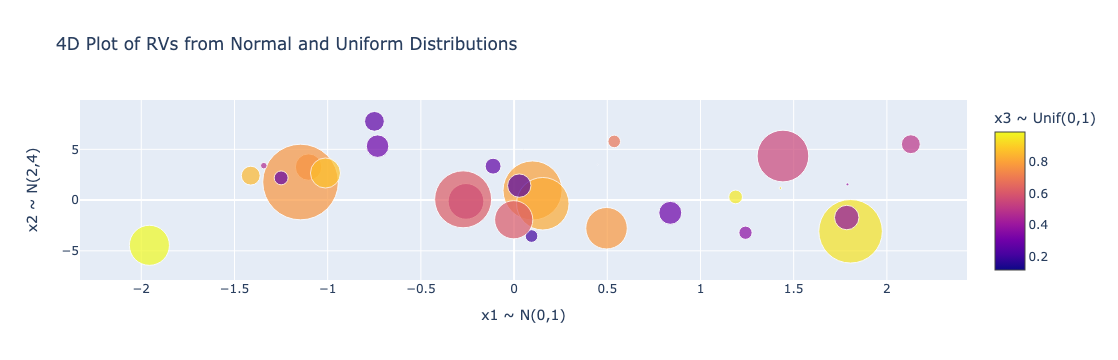

In [103]:
N = 30
x1 = norm.rvs(0,1,N) # sampling from N(0, 1)
x2 = norm.rvs(2,4,N) # sampling from N(2, 4)
x3 = uniform.rvs(0,1,N) # sampling from Unif(0,1)
x4 = x3 * uniform.rvs(0,1,N) # sampling from Unif(0,1)

plot_data(
    x1, 
    x2, 
    colour=x3, 
    size=x4,
    title="4D Plot of RVs from Normal and Uniform Distributions",
    colour_title="x3 ~ Unif(0,1)",
    x_label="x1 ~ N(0,1)",
    y_label="x2 ~ N(2,4)",
    text=[f"Size = {x}" for x in x4],
)

In [104]:
# TBD

## Question 2

## Question 3

## Question 4